In [12]:
import pyBigWig
import pandas as pd

# Paths to the BED and BigWig files
bed_file = "/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/Microglia_peak_set_2.bed"
bigwig_file = "/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/nd_Microglia_merge.normalized.bw"

# Open the BigWig file
bw = pyBigWig.open(bigwig_file)

# Load the BED file into a DataFrame
bed_df = pd.read_csv(bed_file, sep='\t', usecols=[0, 1, 2])
bed_df.columns = ['chrom', 'start', 'end']

def calculate_average_read_depth(chrom, start, end):
    values = bw.values(chrom, start, end, numpy=True)
    return values.sum()

# Calculate average read depth for each peak and store in a new column
bed_df['average_read_depth'] = bed_df.apply(lambda row: calculate_average_read_depth(row['chrom'], row['start'], row['end']), axis=1)

# Close the BigWig file
bw.close()

In [13]:
bw_unnorm = pyBigWig.open("/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/nd_Microglia_merge.bw")


def calculate_average_read_depth(chrom, start, end):
    values = bw_unnorm.values(chrom, start, end, numpy=True)
    return values.mean()

bed_df['average_read_depth_unnormalized'] = bed_df.apply(lambda row: calculate_average_read_depth(row['chrom'], row['start'], row['end']), axis=1)

# Close the BigWig file
bw_unnorm.close()

In [14]:
bed_df

,chrom,start,end,average_read_depth,average_read_depth_unnormalized
0,chr1,1908875,1909376,2.431534,2334.105713
1,chr1,2227720,2228221,2.028441,1947.163696
2,chr1,6613317,6613818,2.698731,2590.596924
3,chr1,7961265,7961766,2.251342,2161.133789
4,chr1,9129001,9129502,1.453836,1395.582886
...,...,...,...,...,...
151345,chr21,17411700,17412201,0.048696,46.744511
151346,chr21,43701281,43701782,0.052898,50.778442
151347,chr22,41994584,41995085,0.065484,62.860279
151348,chr22,45670973,45671474,0.100914,96.870262


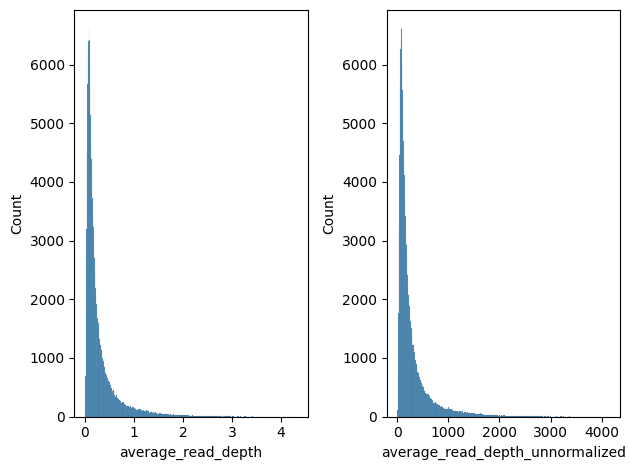

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
sns.histplot(bed_df["average_read_depth"],ax=axs[0])
sns.histplot(bed_df["average_read_depth_unnormalized"],ax=axs[1])
plt.show()

In [29]:
lower_bound = bed_df["average_read_depth"].quantile(0.20)
upper_bound = bed_df["average_read_depth"].quantile(0.90)

# Filter the DataFrame to include only rows with 'average_read_depth' between these bounds
filtered_bed_df = bed_df[(bed_df["average_read_depth"] >= lower_bound) & (bed_df["average_read_depth"] <= upper_bound)]


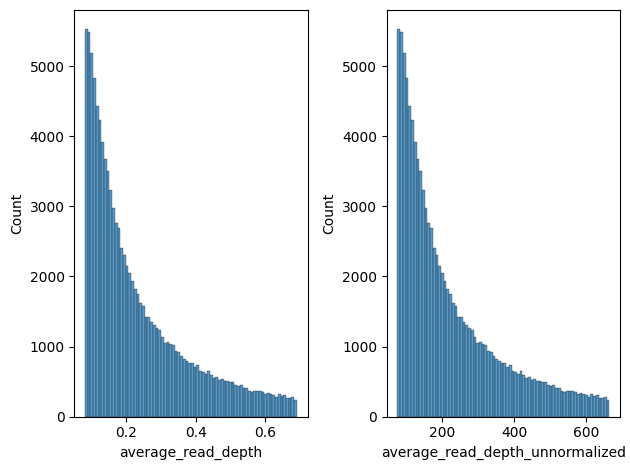

In [30]:

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
sns.histplot(filtered_bed_df["average_read_depth"],ax=axs[0])
sns.histplot(filtered_bed_df["average_read_depth_unnormalized"],ax=axs[1])
plt.show()

In [31]:
clean_bed_df = filtered_bed_df[["chrom", "start", "end"]]
clean_bed_df.to_csv("/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/Microglia_peak_set_2.filtered.bed", sep="\t", index=False, header=False)